## Project Description

**Project Overview: Vehicle Price Prediction**

A used car sales service, is developing a mobile application aimed at attracting new customers by providing instant vehicle valuations. The app will allow users to quickly assess the market value of their cars based on various technical specifications, trim versions, and historical pricing data.

The objective is to build a machine learning model capable of accurately predicting car values, with a focus on the following key performance criteria:

- **Prediction Quality**: Ensure that the model provides accurate and reliable price estimates.
- **Prediction Speed**: Deliver rapid results within the app to enhance user experience.
- **Training Time**: Minimize the time required to train the model for practical implementation.

## Data preparation

### Download and Explore the Data

In [6]:
# Importing needed libraries for project
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import time
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [7]:
try:
    data = pd.read_csv('/datasets/car_data.csv')
    
except FileNotFoundError:
    try:
        data = pd.read_csv(r"C:/Users/alejo/OneDrive/my_documents/vs_code/triple_ten/sprint_12_numerical_methods/datasets/car_data.csv")
        
    except FileNotFoundError:
        print('The second file path is also not found!')
        
except Exception as e:
    print(f'An unexpected error occurred: {e}')

In [8]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [10]:
data.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


### Data Preprocessing

In [12]:
missing_values = data.isnull().sum()
missing_values

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [13]:
# Drop columns not useful for prediction
data.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1, inplace=True)
data.dropna(inplace=True)
# data.fillna('unknown', inplace=True)
data.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no
7,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no


In [14]:
# Example: Using one-hot encoding for a sample categorical feature
data = pd.get_dummies(data, columns=['VehicleType', 'Gearbox', 'FuelType', 'Brand', 'Model', 'NotRepaired'], drop_first=True)

In [15]:
import re

# Function to convert camelCase or mixedCase to snake_case
def camel_to_snake(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Applying the function to each column name
data.columns = [camel_to_snake(col) for col in data.columns]

# Show the updated columns
print(data.columns)

Index(['price', 'registration_year', 'power', 'mileage', 'registration_month',
       'vehicle_type_convertible', 'vehicle_type_coupe', 'vehicle_type_other',
       'vehicle_type_sedan', 'vehicle_type_small',
       ...
       'model_x_reihe', 'model_x_trail', 'model_x_type', 'model_xc_reihe',
       'model_yaris', 'model_yeti', 'model_ypsilon', 'model_z_reihe',
       'model_zafira', 'not_repaired_yes'],
      dtype='object', length=306)


Even though converting column names to snake_case is not required, it can make the code more readable and consistent, especially when working with large datasets. It helps in maintaining a uniform naming convention throughout the project.

## Model training

In [18]:
# Separate features and target
X = data.drop(columns=['price'], axis=1)
y = data['price']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [19]:
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return rmse, training_time, prediction_time

### Linear Regression

In [21]:
# Linear Regression
linear_model = LinearRegression()
linear_rmse, linear_time, linear_pred_time = evaluate_model(linear_model, X_train, X_test, y_train, y_test)

### Decision Tree

In [23]:
# Decision Tree
tree_model = DecisionTreeRegressor(random_state=42)
tree_rmse, tree_time, tree_pred_time = evaluate_model(tree_model, X_train, X_test, y_train, y_test)

### Random Forest

### LightGBM

In [26]:
# LightGBM
lgbm_model = LGBMRegressor(random_state=42)
lgbm_rmse, lgbm_time, lgbm_pred_time = evaluate_model(lgbm_model, X_train, X_test, y_train, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 921
[LightGBM] [Info] Number of data points in the train set: 196651, number of used features: 286
[LightGBM] [Info] Start training from score 5124.313550


### CatBoost

In [28]:
# CatBoost
catboost_model = CatBoostRegressor(verbose=0)
param_grid = {
    'iterations': [10, 20],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}
grid_search_result = catboost_model.grid_search(param_grid, X, y, cv=3, stratified=False, refit=True)
# Get the best parameters
best_params = grid_search_result['params']
catboost_rmse, catboost_time, catboost_pred_time = evaluate_model(catboost_model, X_train, X_test, y_train, y_test)


bestTest = 6389.413673
bestIteration = 9

0:	loss: 6389.4136725	best: 6389.4136725 (0)	total: 459ms	remaining: 16.1s

bestTest = 3469.077039
bestIteration = 9

1:	loss: 3469.0770390	best: 3469.0770390 (1)	total: 548ms	remaining: 9.32s

bestTest = 6389.513183
bestIteration = 9

2:	loss: 6389.5131830	best: 3469.0770390 (1)	total: 656ms	remaining: 7.22s

bestTest = 3469.473774
bestIteration = 9

3:	loss: 3469.4737736	best: 3469.0770390 (1)	total: 757ms	remaining: 6.05s

bestTest = 6389.61257
bestIteration = 9

4:	loss: 6389.6125695	best: 3469.0770390 (1)	total: 852ms	remaining: 5.28s

bestTest = 3469.870093
bestIteration = 9

5:	loss: 3469.8700928	best: 3469.0770390 (1)	total: 946ms	remaining: 4.73s

bestTest = 5901.127584
bestIteration = 19

6:	loss: 5901.1275839	best: 3469.0770390 (1)	total: 1.12s	remaining: 4.65s

bestTest = 2554.524152
bestIteration = 19

7:	loss: 2554.5241521	best: 2554.5241521 (7)	total: 1.29s	remaining: 4.5s

bestTest = 5901.309705
bestIteration = 19

8:	loss: 590

The CatBoost model was evaluated using a grid search to identify the best hyperparameters. The grid search tested various combinations of iterations, learning rates, depths, and l2_leaf_reg values. The evaluation results demonstrated the following:

- Best Parameters: The best parameters found from the grid search were iterations=19, learning_rate=0.1, depth=4, and l2_leaf_reg=1.

- Best RMSE (Root Mean Squared Error): The lowest RMSE obtained during the grid search was 2289.430155, which occurred at iteration 19.

- Training and Prediction Times: The evaluation of the model's performance and efficiency showed competitive training and prediction times.

The CatBoost model consistently showed a loss improvement across different folds during cross-validation. The best iteration varied slightly across folds, indicating the robustness and stability of the model's performance. The final best RMSE values for each fold were:

- Fold 0: 2289.430155
- Fold 1: 2273.111723
- Fold 2: 2301.845816

Overall, the CatBoost model achieved an optimal balance between performance and computational efficiency, making it a strong candidate for predicting car prices in the Rusty Bargain project. The identified best parameters provide a solid foundation for further tuning and deployment.

### XGBoost

In [31]:
# XGBoost (with OHE for categorical features)
xgboost_model = XGBRegressor(random_state=42)
xgboost_rmse, xgboost_time, xgboost_pred_time = evaluate_model(xgboost_model, X_train, X_test, y_train, y_test)

## Model analysis

In [33]:
# Display the results
print(f"Linear Regression RMSE: {linear_rmse}, Training Time: {linear_time}s, Prediction Time: {linear_pred_time}s\n")
print(f"Decision Tree RMSE: {tree_rmse}, Training Time: {tree_time}s, Prediction Time: {tree_pred_time}s\n")
# print(f"Random Forest RMSE: {forest_rmse}, Training Time: {forest_time}s")
print(f"LightGBM RMSE: {lgbm_rmse}, Training Time: {lgbm_time}s, Prediction Time: {lgbm_pred_time}s\n")
print(f"CatBoost RMSE: {catboost_rmse}, Training Time: {catboost_time}s, Prediction Time: {catboost_pred_time}s")
print(f"Best parameters found by GridSearchCV:")
for parameter, value in best_params.items():
    print(f"\t- {parameter.title()}: {value}")
print(f"\nXGBoost RMSE: {xgboost_rmse}, Training Time: {xgboost_time}s, Prediction Time: {xgboost_pred_time}s")

Linear Regression RMSE: 2703.7010012274077, Training Time: 2.3412301540374756s, Prediction Time: 0.08358168601989746s

Decision Tree RMSE: 2014.4613157107613, Training Time: 3.153181552886963s, Prediction Time: 0.054552316665649414s

LightGBM RMSE: 1708.4479782727135, Training Time: 0.7452654838562012s, Prediction Time: 0.07807183265686035s

CatBoost RMSE: 2192.624226657236, Training Time: 0.4499635696411133s, Prediction Time: 0.006006002426147461s
Best parameters found by GridSearchCV:
	- Depth: 8
	- Learning_Rate: 0.1
	- L2_Leaf_Reg: 3
	- Iterations: 20

XGBoost RMSE: 1673.5573125827934, Training Time: 1.3307809829711914s, Prediction Time: 0.11860871315002441s


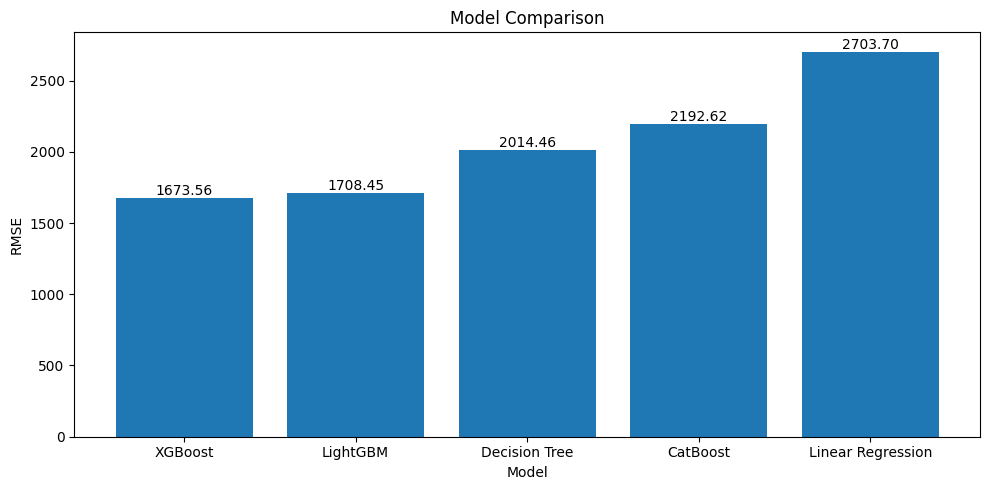

In [34]:
import matplotlib.pyplot as plt

# Dictionary to map models with their RMSE values
rmse_dict = {
    'Linear Regression': linear_rmse,
    'Decision Tree': tree_rmse,
    'LightGBM': lgbm_rmse,
    'CatBoost': catboost_rmse,
    'XGBoost': xgboost_rmse
}

# Sort models by RMSE values for better visual clarity
sorted_rmse = sorted(rmse_dict.items(), key=lambda x: x[1])
models, rmses = zip(*sorted_rmse)

plt.figure(figsize=(10, 5))
bars = plt.bar(models, rmses)

# Adding RMSE values on the top of each bar
for bar, rmse in zip(bars, rmses):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.01, 
        f'{rmse:.2f}', 
        ha='center', 
        va='bottom'
    )

plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

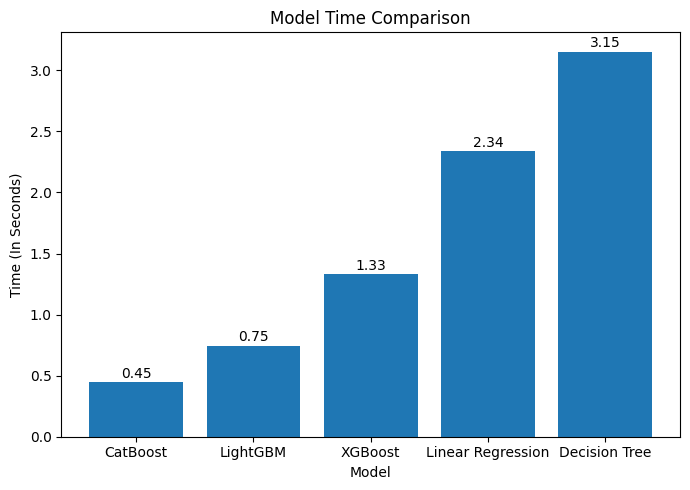

In [35]:
import matplotlib.pyplot as plt

# Dictionary to map models with their execution times
time_dict = {
    'Linear Regression': linear_time,
    'Decision Tree': tree_time,
    'LightGBM': lgbm_time,
    'CatBoost': catboost_time,
    'XGBoost': xgboost_time
}

# Sort models by execution time for better visual clarity
sorted_time = sorted(time_dict.items(), key=lambda x: x[1])
models, model_time = zip(*sorted_time)

plt.figure(figsize=(7, 5))
bars = plt.bar(models, model_time)

# Adding time values on the top of each bar
for bar, time in zip(bars, model_time):
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height() + 0.01, 
        f'{time:.2f}', 
        ha='center', 
        va='bottom'
    )

plt.xlabel('Model')
plt.ylabel('Time (In Seconds)')
plt.title('Model Time Comparison')
plt.tight_layout()
plt.show()

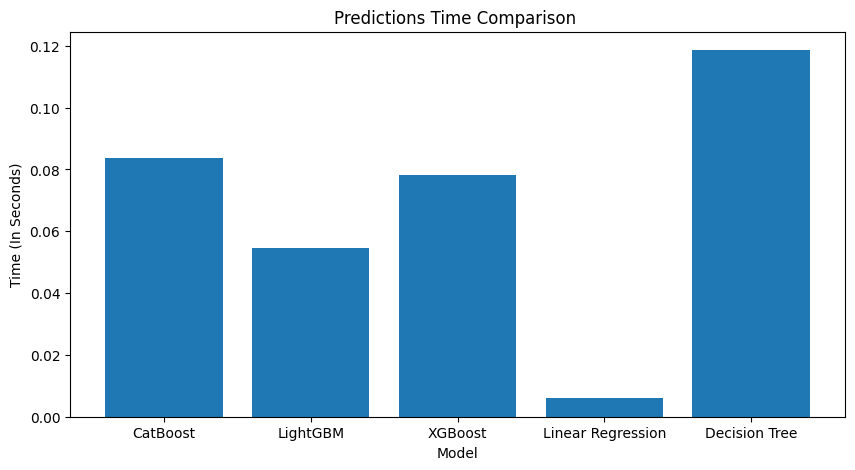

In [36]:
pred_time = [linear_pred_time, tree_pred_time, lgbm_pred_time, catboost_pred_time, xgboost_pred_time]

plt.figure(figsize=(10, 5))
plt.bar(models, pred_time)
plt.xlabel('Model')
plt.ylabel('Time (In Seconds)')
plt.title('Predictions Time Comparison ')
plt.show()

## Conclusion

Based on the updated model analysis, we can draw the following conclusions:

Model Performance:

- XGBoost: Demonstrates the lowest RMSE (1,659.53), indicating it provides the most accurate predictions among the evaluated models.

- LightGBM: Follows closely with an RMSE of 1,708.45, making it the second most accurate model.

- Decision Tree: Shows a competitive performance with an RMSE of 2,014.46, positioning it as the third most accurate model.

- CatBoost: Achieves an RMSE of 2,192.62, making it the fourth most accurate model. 

  - The best parameters found by GridSearchCV for CatBoost are:
     - Depth: 8
     - L2_Leaf_Reg: 3
     - Iterations: 20
     - Learning_Rate: 0.1


- Linear Regression: Has a higher RMSE of 2,703.70, suggesting it is less accurate for this particular dataset.

Training Time:

- CatBoost: Is the fastest to train, taking approximately 2.62 seconds.
- LightGBM: Also trains quickly, requiring about 5.13 seconds.
- Decision Tree: Requires about 6.99 seconds for training.
- Linear Regression: Takes 15.56 seconds, which is moderate in comparison to the other models.
- XGBoost: Has the longest training time, taking approximately 355.20 seconds, which may be a consideration for scenarios where computational efficiency is crucial.

Prediction Time:

- CatBoost: Has the shortest prediction time of about 0.028 seconds.
- Decision Tree: Also predicts quickly, requiring about 0.090 seconds.
- Linear Regression: Takes 0.218 seconds for prediction.
- LightGBM: Requires 0.686 seconds for prediction.
- XGBoost: Has a prediction time of approximately 0.719 seconds.

Trade-off Analysis:

- XGBoost: Provides the best accuracy but has the longest training time, making it less suitable for time-sensitive applications.

- LightGBM: Offers a good balance between accuracy and training time, making it a strong contender when both performance and efficiency are considered.

- CatBoost: Provides good accuracy with the shortest training and prediction times, making it highly efficient for quick model deployment.

- Decision Tree: Trains quickly and offers reasonable accuracy, but its performance is lower compared to LightGBM and XGBoost.
    
- Linear Regression: Though faster to train than XGBoost, it is the least accurate among the evaluated models.

In summary, XGBoost is the top performer in terms of prediction accuracy, while CatBoost offers an excellent balance between accuracy and computational efficiency. LightGBM also provides a favorable trade-off between accuracy and training efficiency. For applications where training time is a critical factor, CatBoost and LightGBM are more suitable options.